
In this competition your task will be to predict the mean math exam result for students of tutors in test.csv. You will be given two datasets: train.csv and test.csv .

Задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv.

Вам будут даны два датасета:

train.csv содержит признаки и целевую переменную 

test.csv только признаки.

In [15]:
#Подключение библиотек

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [16]:
#Запись данных в формате Pandas DataFrame в соответсвующие переменные / Writing data in Pandas DataFrame format to variables
#df_train = pd.read_csv("./Загрузки/train.csv")
#df_test = pd.read_csv("./Загрузки/test.csv")
df_train = pd.read_csv("C://Users//Ergney//Downloads//train.csv")
df_test = pd.read_csv("C://Users//Ergney//Downloads//test.csv")

#df_submission = pd.read_csv("./Загрузки/submission_example.csv")

<p style="font-size:26"><b>Первичный анализ данных</b></p>

In [17]:
#Вывод общей информации о названии, заполнености столбцов и типах данных в них.
#Displays general information about the name, the filling of the columns and the types of data in them.

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


10 столбцов, 8 из них признаки, 1 целевая переменная, первый столбец индекс - не имеет отношения к данным. Нет пропусков в данных.

In [18]:
#Рассмотрим как распределены значения признаков в датасете.

#Выделим 9 персентилей от 0.1 до 0.9, для более подробной оценки данных.
percentiles = [i/10 for i in range(1,10)]

#Выведем числовую информацию о данных. 
df_train.describe(percentiles=percentiles, include="all")
#df.describe(include=['object', 'bool'])

Id           age  years_of_experience  lesson_price  \
count  10000.00000  10000.000000         10000.000000  10000.000000   
mean    4999.50000     45.878000             1.986800   1699.105000   
std     2886.89568      8.043929             1.772213    524.886654   
min        0.00000     23.000000             0.000000    200.000000   
10%      999.90000     36.000000             0.000000   1150.000000   
20%     1999.80000     39.000000             0.000000   1250.000000   
30%     2999.70000     42.000000             1.000000   1350.000000   
40%     3999.60000     44.000000             1.000000   1450.000000   
50%     4999.50000     46.000000             2.000000   1500.000000   
60%     5999.40000     48.000000             2.000000   1700.000000   
70%     6999.30000     50.000000             3.000000   1950.000000   
80%     7999.20000     53.000000             4.000000   2200.000000   
90%     8999.10000     56.000000             4.000000   2400.000000   
max     9999.00000     68.000000            10.000000   3950.000000   

       qualification       physics     chemistry       biology       english  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        1.719500      0.375000      0.132900      0.109600      0.053700   
std         0.792264      0.484147      0.339484      0.312406      0.225436   
min         1.000000      0.000000      0.000000      0.000000      0.000000   
10%         1.000000      0.000000      0.000000      0.000000      0.000000   
20%         1.000000      0.000000      0.000000      0.000000      0.000000   
30%         1.000000      0.000000      0.000000      0.000000      0.000000   
40%         1.000000      0.000000      0.000000      0.000000      0.000000   
50%         2.000000      0.000000      0.000000      0.000000      0.000000   
60%         2.000000      0.000000      0.000000      0.000000      0.000000   
70%         2.000000      1.000000      0.000000      0.000000      0.000000   
80%         3.000000      1.000000      0.000000      0.000000      0.000000   
90%         3.000000      1.000000      1.000000      1.000000      0.000000   
max         4.000000      1.000000      1.000000      1.000000      1.000000   

          geography       history  mean_exam_points  
count  10000.000000  10000.000000      10000.000000  
mean       0.032100      0.019400         64.340800  
std        0.176274      0.137933         13.536823  
min        0.000000      0.000000         32.000000  
10%        0.000000      0.000000         47.000000  
20%        0.000000      0.000000         53.000000  
30%        0.000000      0.000000         57.000000  
40%        0.000000      0.000000         60.000000  
50%        0.000000      0.000000         63.000000  
60%        0.000000      0.000000         67.000000  
70%        0.000000      0.000000         70.000000  
80%        0.000000      0.000000         77.000000  
90%        0.000000      0.000000         84.000000  
max        1.000000      1.000000        100.000000

Первый столбец age - возраст преподавателя в годах. Вероятнее всего его влияние не слишком большое, но изучить стоит.

Второй столбец years_of_experience - Количество лет сколько преподает учитель. Аномальных значений не наблюдается.

Третий столбец lesson_price - Цена занятия в каких то денежных единицах. Аномальных значений не наблюдается.

Четвертый столбец qualification - Квалицикация. Пока не совсем понятно, как интерпритировать этот признак. По всей видимости это некое распределение преподавателей по 4 группам. Чем выше группа тем выше квалификация. Ниже данный признак будет рассмотрен отдельно подробнее.

Далее идут пять столбцов (physics, chemistry, biology, english, geography, history) все они очевидно означают какую-то дисциплину. Скорее всего ту по которой так же репетитор дает занятия или вроде того. Они представлены в виде булевых значений (0|1)

Последний столбец mean_exam_points - целевая переменная. Должна находиться в диапазоне от 0 до 100. Аномальных значений не наблюдается. Ниже будет рассмотрено её распределение.

In [19]:
#Рассмотрим подробнее признак qualification

df_train["qualification"].value_counts()

1.0    4884
2.0    3087
3.0    1979
4.0      50
Name: qualification, dtype: int64

Как видно признак действительно принимает 4 значения. Для оценки признака разумно будет рассмотреть среднее значение целевой переменной для каждого из них.

In [20]:
#Сделаем функцию для вывода коэфицента корреляции Пирсона между двумя признаками.

def correlation(df,x,y):
    n = df[x].shape[0]
    
    x_mean = sum(df[x]) / (n - 1)
    y_mean = sum(df[y]) / (n - 1)
    
    x_disp = (sum((df[x] - x_mean)**2) / (n-1))**0.5
    y_disp = (sum((df[y] - y_mean)**2) / (n-1))**0.5
    
    cov = sum((df[x] - x_mean) * (df[y] - y_mean)) / (n - 1)
    cor = round(cov / (x_disp * y_disp), 2)
    
    return  cor

In [21]:
#Сделаем функцию для вывода среднего значения одного признака для каждого значения другого признака. 

def target_feature_chek(df, feature, target="mean_exam_points"):
    values = np.sort(df[feature].unique())
    
    for value in values:
        result = round(np.mean(df[target].loc[df[feature] == value]), 2)
        print(f'Среднее значение {target} среди записей где {feature} = {value} составляет: {result}')
        
    #Так же добавим вывод коэфицента корреляции Пирсона между этими признаками.
    
    corr = correlation(df, feature, target)
    
    print(f'Коэффицент корреляции Пирсона для признаков:  {corr}')

In [22]:
target_feature_chek(df_train, "qualification")

Среднее значение mean_exam_points среди записей где qualification = 1.0 составляет: 55.92
Среднее значение mean_exam_points среди записей где qualification = 2.0 составляет: 65.06
Среднее значение mean_exam_points среди записей где qualification = 3.0 составляет: 83.49
Среднее значение mean_exam_points среди записей где qualification = 4.0 составляет: 84.66
Коэффицент корреляции Пирсона для признаков:  0.76


In [23]:
#Как видно признак qualification довольно сильно коррелирует с целевой переменной. 
#Сделаем подобную оценку с другими булевыми признаками (physics, chemistry, biology, english, geography, history)

feautures = ["physics", "chemistry", "biology", "english", "geography", "history"]

for feauture in feautures:
    target_feature_chek(df_train, feauture)
    print("-------------------------------------------")

Среднее значение mean_exam_points среди записей где physics = 0.0 составляет: 62.37
Среднее значение mean_exam_points среди записей где physics = 1.0 составляет: 67.62
Коэффицент корреляции Пирсона для признаков:  0.19
-------------------------------------------
Среднее значение mean_exam_points среди записей где chemistry = 0.0 составляет: 64.25
Среднее значение mean_exam_points среди записей где chemistry = 1.0 составляет: 64.96
Коэффицент корреляции Пирсона для признаков:  0.02
-------------------------------------------
Среднее значение mean_exam_points среди записей где biology = 0.0 составляет: 64.23
Среднее значение mean_exam_points среди записей где biology = 1.0 составляет: 65.23
Коэффицент корреляции Пирсона для признаков:  0.02
-------------------------------------------
Среднее значение mean_exam_points среди записей где english = 0.0 составляет: 64.3
Среднее значение mean_exam_points среди записей где english = 1.0 составляет: 65.09
Коэффицент корреляции Пирсона для призна

In [24]:
#Теперь оценим числовые признаки.
#Для этого реализуем функцию выводящую график зависимости одного параметра от другого.

def get_graph_dependency(df, target, *args, **kwargs):
    quantiles = [i/100 for i in range(0,101)]
    for feature in args:
        feature_quantiles = np.unique(df[feature].quantile(quantiles).values)
        
        X_value = []
        Y_value = []
        
        fig, ax = plt.subplots(nrows=1, ncols=1)
        fig.set_size_inches(8, 6)
        
        for x_0, x_1 in zip(feature_quantiles,feature_quantiles[1:]):
            
            x = df[(df[feature] >= x_0) & (df[feature] < x_1)][[feature, target]].mean().values
            
            X_value.append(x[0])
            Y_value.append(x[1])
            
        corr = correlation(df, feature, target)
        
        ax.plot(X_value, Y_value, label=f'{feature}. correlation: {corr}')      
        ax.set_xlabel("feature")
        ax.set_ylabel(f"{target}")
        ax.legend() 

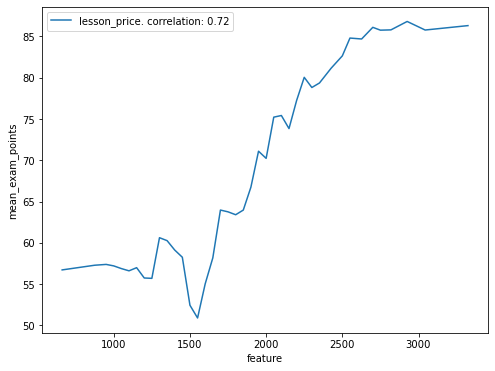

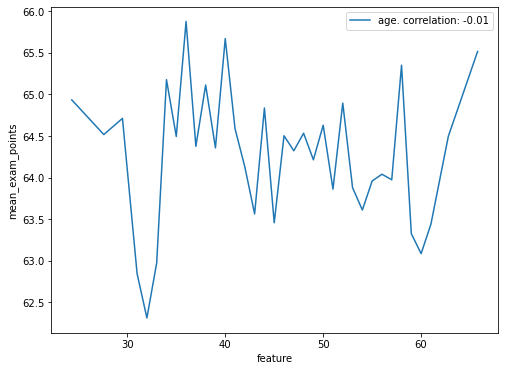

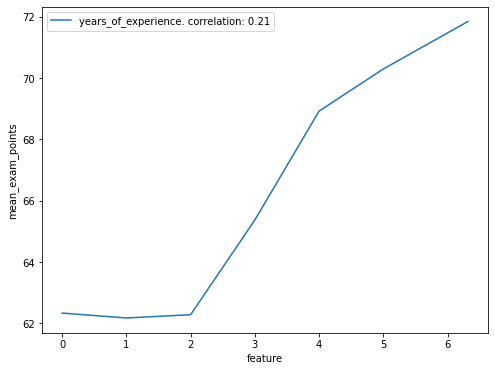

In [25]:
get_graph_dependency(df_train, "mean_exam_points", 'lesson_price', 'age', "years_of_experience")

    Как видно признак lesson_price от минимума до 1500 не особо связан с целевой переменной, а вот дальше довольно сильно коррелирует с ней.
    Признак age покрайне мере явно не виляет на целевую переменную.
    Признак years_of_experience начиная с 2 так же коррелирует с целевой переменной хоть и довольно слабо. 

Каких-либо заметных выбросов в данных не набюлюдается. Так что приступим к посторению базовых моделей. Используем в них все текущие признаки за исключением id который явно не несет смысловой нагрузки. После оценки метрики базовых моделей, будем стремиться минимизировать ошибку, путем манипуляций с данными, гиперпараметрами и т д. 
    
       Для итоговой оценки будет использоваться коэффицент детерминации и MSE в качестве дополнительной метрики.

### Линейная модель. Подготовка данных. Создание необходимых вспомогательных функций.

In [26]:
# Выделение призанков и целевой переменный в соответсвующие переменные.
df_train = df_train[df_train.columns[1:]]
df_test = df_test[df_test.columns[1:]]



# Разделение выборки на тестовую и тренировочную 
X_train, X_test, y_train, y_test = train_test_split(df_train[df_train.columns[:-1]], df_train[df_train.columns[-1]], test_size=0.3, random_state=42)

In [27]:
#Вычисление функции ошибки MSE

def mse(y, y_pred):
    result = sum((y - y_pred)**2)/y.shape[0]
    return result

In [28]:
#Вычисление коэффицента детерминации r2

def coef_determination(y, y_pred):
    n = y.shape[0]
    mean_y = y.mean()
    mse_const = mse(y, mean_y)
    mse_model = mse(y, y_pred)
    determination = 1 - (mse_model / mse_const)
    return determination

In [29]:
#Нормализация признаков

def norm(data):
    columns = data.columns
    
    norm_data = data.copy()
    
    for i in columns:
        min_data = norm_data[i].min()
        max_data = norm_data[i].max()
        norm_data[i] = (norm_data[i] - min_data)/(max_data - min_data)
            
    return norm_data

In [30]:
#Стандартизация признаков

def standart(data):
    columns = data.columns
    n  = data.shape[0]
    
    standart_data = data.copy()
    
    for i in columns:
        mean = np.mean(standart_data[i])
        stdev = np.sqrt(sum((standart_data[i]-mean)**2)/n)
        
        standart_data[i] = (standart_data[i] - mean)/stdev
    
    return standart_data

#### Получение нормализованных признаков.

In [31]:
n_X_train = norm(X_train)
n_X_test = norm(X_test)

### Создание модели градиентного бустинга

In [98]:
#Создаем класс линейной модели

class Linear_model:
    best_W = None
    best_error = None
    iteration = None
    
    #Создание объекта класса линейной модели. Установка гиперпараметров.
    def __init__(self, alpha=0.001, iterations=10000, stop_value=0.0001, print_param = False):
        self.alpha = alpha
        self.iterations = iterations
        self.stop_value = stop_value
        self.print_param = print_param
        
    #Функция обучения модели (Вычисление оптимальных весов W с заданными параметрами)
    def fit(self, data, target):
        data = data.copy()
        #if np.any(data.max() > 1):
            #data = norm(data)
        #Задание начальных нулевых весов
        W = np.ones(data.shape[1], dtype=float)
        n = data.shape[0]
        data = np.array(data)
        target =  np.array(target)
        for i in tqdm(range(self.iterations)):
            iteration = i
            #Вычисление промежуточных предсказаний до обновления весов
            y_pred = np.dot(data, W)
            
            #Вычисление промежуточной ошибки до обновления весов
            error = mse(target, y_pred)
            
            
            old_W = W
            #Обновление весов
            W -= (self.alpha * 2 * np.dot(data.T, (y_pred - target))) / n
    
            #Вычисление промежуточных предсказаний после обновления весов
            new_y_pred = np.dot(data, W)
            #Вычисление промежуточной ошибки после обновления весов
            new_error = mse(target, new_y_pred)

            #Условие остановки если прирост качества меньше минимального
            if error - new_error < self.stop_value:
                break
                
        #Вычисление и вывод ошибок для тренеровочной выборки и предсказаний, а так же параметров модели.       
        coef_determ = coef_determination(target, y_pred)
        
        if self.print_param:
            print(f'End iteration:{iteration+1}')        
            print(f'End MSE:{error}')
            print(f'R2 for train data:{coef_determ}')
            print(f'Params: alpha={self.alpha}, stop_value={self.stop_value}, max_iteration={self.iterations}')
            print(f'W:{old_W}')

        self.best_W = old_W
        self.best_error = error
        self.iteration = iteration


    #Функция получения предсказаний модели.
    def predict(self, data, target=None):
        result = np.dot(data, self.best_W)
        
        #Вывод ошибок для тестовой выборки еслии она есть.
        if target is not None:
            mse_test = mse(target, result)
            coef_determ_test = coef_determination(target, result)
            
            if self.print_param:
                print(f"MSE for test data:{mse_test}")
                print(f"R2 for test data:{coef_determ_test}")
                
            self.mse_test = mse_test
            self.coef_determ_test = coef_determ_test
        
        return result

#### Работа модели на стоковых данных

In [99]:
model1 = Linear_model(print_param=True)
model1.fit(X_train, y_train)
model1.predict(X_test, y_test)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

End iteration:1
End MSE:3113819.915714286
R2 for train data:-16928.235892733694
Params: alpha=0.001, stop_value=0.0001, max_iteration=10000
W:[-1.53488238e+02 -6.20801771e+00 -6.28306293e+03 -5.45144943e+00
 -2.52681429e-01  5.59168571e-01  6.29806000e-01  8.21109143e-01
  8.90577714e-01  9.36356857e-01]
MSE for test data:124237307847019.9
R2 for test data:-684196644330.7776


array([ -9745819.09853228,  -5975999.39701486, -10688751.977736  , ...,
        -8174740.99374571, -13830128.69332857,  -8174900.69000143])

Как видно на стоковых данных все очень плохо модель просто не работает.

### Работа модели на нормализованных данных

In [100]:
model1 = Linear_model(alpha=0.005, iterations=30000, stop_value=0.0001, print_param=True)
model1.fit(n_X_train, y_train)
model1.predict(n_X_test, y_test)

 76%|████████████████████████████████████████████████████████▋                  | 22653/30000 [00:31<00:10, 719.02it/s]

End iteration:22654
End MSE:145.6757062757954
R2 for train data:0.20798939497507696
Params: alpha=0.005, stop_value=0.0001, max_iteration=30000
W:[30.86102409  5.23408682 98.01356679  2.6282759   8.56776209  2.56596295
  3.48807821  3.58930203  1.83417565  1.73506729]
MSE for test data:145.50254427549507
R2 for test data:0.1986919689404909


array([54.20582451, 52.42541356, 58.78093624, ..., 51.72021959,
       80.3204269 , 52.98758533])

На нормализованных стоковых данных уже имеется какой-то результат. Хоть он и не слишком хорош, но по крайне мере модель работает. В дальнейшем постараемся улучшить качество её предсказаний.

### Модель случайного леса.

In [147]:
# Модель случайного леса

# Реализуем класс узла
class Node:

    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле


# Реализуем класс терминального узла (листа)
class Leaf:

    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict(labels)

    def predict(self, labels):
        pred = labels.mean()
        return pred


class Random_forest1:
    np.random.seed(42)

    # Создание обьекта модели. Установка параметров модели.
    def __init__(self, tree_counts=5, max_deep_tree=15, min_items_for_leaf=10, checking_progress=False,
                 checking_main_progress=False):
        self.tree_counts = tree_counts  # Количество деревьев в лесе
        self.max_deep_tree = max_deep_tree  # Максимальная глубина дерева
        self.min_items_for_leaf = min_items_for_leaf  # Минимальное количество обьектов в листе
        self.checking_progress = checking_progress
        self.checking_main_progress = checking_main_progress
        if self.checking_progress or self.checking_main_progress:
            print(
                f'Параметры модели: \n Колличество деревьев:{self.tree_counts}\n Максимальная глубина дерева:{max_deep_tree}\n Минимальное колличество объектов в листе:{self.min_items_for_leaf}')

    # Создание bootstrap выборок
    def _get_bootstrap(self, data):
        bootstrap = []  # Список куда будут заноситься индексы объектов которые попадут в выборку.
        n_samples = data.shape[0]  # Определение длинны выборки
        index = data.index.values  # Получение всех индексов из общего датасета
        for i in range(self.tree_counts):  # Итерация по количеству деревьев
            if self.checking_progress:
                print(f'Получение индексов для bootstrap выборок: {i + 1}/{self.tree_counts}')
            b_data_list = []  # Список с индексами для одного дерева
            for j in range(n_samples):  # Итерация по количеству обьектов в однйо выборке
                sample_index = np.random.randint(n_samples)  # Определение случайного числа
                b_data = index[sample_index]  # Выбор случайного индекса из списка всех индексов
                b_data_list.append(b_data)  # Добовление этого индекса в соотвествующий список
            bootstrap.append(b_data_list)  # Добовление листа с индексами в соответсвующий список

        return bootstrap

    # Функция расчета дисперсии
    def _disp(self, data):
        n = data.shape[0]
        mean = data.mean()
        disp = ((data - mean) ** 2).mean()

        return disp

    # Функция расчета качества
    def _qualit(self, data, l_branch, r_branch):

        # Определение дисперсии данных
        data_disp = self._disp(data)
        r_branch_disp = self._disp(r_branch)
        l_branch_disp = self._disp(l_branch)

        # Определение размерности данных
        n = data.shape[0]
        n_left = l_branch.shape[0]
        n_right = r_branch.shape[0]

        # Вычисление ошибки
        Q = data_disp - (n_left / n) * r_branch_disp - (n_right / n) * l_branch_disp

        return Q

    # Функция разделения выборки на подвыборки
    def _split(self, t, data, colomn_name):

        # Определение индексов для выборок которые удволетворяют и неудволетворяют условию разделения
        left_index = data[data[colomn_name] <= t].index
        right_index = data[data[colomn_name] > t].index

        # Разделение выборки по полученным индексам
        true_data = self.full_data.iloc[left_index]
        false_data = self.full_data.iloc[right_index]
        true_target = self.full_labels.iloc[left_index]
        false_target = self.full_labels.iloc[right_index]

        return true_data, false_data, true_target, false_target

    # Функция нахождения лучших параметров для разделения
    def _find_best_split(self, data, target):
        columns = data.columns
        best_quality = 0
        best_t = None
        best_index = None

        # Итерация по признакам
        for colomn in columns:

            t_list = np.unique(data[colomn])

            # Итерация по уникальным значениям признака
            for t in t_list:
                true_data, false_data, true_labels, false_labels = self._split(t=t, data=data,
                                                                               colomn_name=colomn)
                # Пропуск если в листе оказалось меньше минимального количества обьектов
                if true_data.shape[0] < self.min_items_for_leaf or false_data.shape[0] < self.min_items_for_leaf:
                    continue
                # Вычисление точности при выбранном признаке и значении
                current_quality = self._qualit(target, true_labels, false_labels)

                # Замена параметров для узла если точность превосходит предыдущюю
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, colomn

        return best_quality, best_t, best_index

    # Функция построения дерева
    def _build_tree(self, data, target, leaf_count, deep=1):

        if self.checking_progress:
            print(f"\nОпределение параметров разделения. Глубина:{deep}, Обеъктов в узле: {target.shape[0]}")
        quality, t, index = self._find_best_split(data, target)  # получение параметров разделения

        # Остановка построения ветки если достигнута максимальная глубина
        if deep > self.max_deep_tree:
            self.leaf_count += 1
            if data.shape[0] > self.max_objet:
                self.max_objet = data.shape[0]
            if self.checking_progress:
                print(f"\nДостигнута максимальная глубина дерева. Остановка построения ветки\n")
            return Leaf(data, target)

        # Остановка построения ветки если нет прироста точности
        if quality == 0:
            self.leaf_count += 1
            if data.shape[0] > self.max_objet:
                self.max_objet = data.shape[0]
            if self.checking_progress:
                print(f"\nОтсутсвие прироста качества. Остановка построения ветки\n")
            return Leaf(data, target)

        if self.checking_progress:
            print(f"Параметры выбраны. Признак: {index} , Занчение: {t}")

        if self.max_deep <= deep:
            self.max_deep = deep
        # Разделение выборки
        true_data, false_data, true_labels, false_labels = self._split(t, data, index)

        # Рекурсивное построение дерева на разделенных выборках
        true_branch = self._build_tree(true_data, true_labels, deep=(deep + 1), leaf_count=self.leaf_count)
        false_branch = self._build_tree(false_data, false_labels, deep=(deep + 1), leaf_count=self.leaf_count)

        return Node(index, t, true_branch, false_branch)

    # Функция обучения модели
    def fit(self, data, labels):

        # Задание полных данных
        self.full_data = data
        self.full_labels = labels

        forest = []  # Создание списка с деревьями

        bootstrap = self._get_bootstrap(data)  # Получние бутстрап выборок
        all_index = data.index  # Получение индексов всех данных
        out_of_bag_index = []  # Создание списка, куда будут помещены индксы, не использовавшиеся в обучении деревьев
        n = 0
        for index in bootstrap:  # Итерация по количеству бутстрап выборок (деревьев)
            n += 1
            if self.checking_progress:

                print(f'\nНачало обучение дерва №{n} из {len(bootstrap)}\n')

            dont_use_data_index = []  # Создание листа куда заносятся индексы не использовавшиеся в конкретном дереве

            # Выбор тех индексов из всех индексов, котрых нет в бутстрап выборке

            if self.checking_progress:
                print(f'Получение индексов для тестовой выборки')
            for i in all_index:
                if i not in index:
                    dont_use_data_index.append(i)

            b_data = data.iloc[index]  # Выбор бутстрап выборки из всех данных по соответсвующим индексам
            b_labels = labels.iloc[index]  # Выбор целевых переменных от этих данных
            if self.checking_main_progress or self.checking_progress:
                print(f"----------------Построение дерева №{n}--------------------------------")
                self.leaf_count = 0
                self.max_deep = 0
                self.max_objet = 0
            forest.append(
                self._build_tree(b_data, b_labels, leaf_count=0))  # Построение дерева по одной бутстрап выборке
            if self.checking_main_progress or self.checking_progress:
                print(f"\n\n----------------Дерево №{n} построено--------------------------------\n\n")
                print(f'Максимальная глубина: {self.max_deep} | Колличество листьев: {self.leaf_count} | Максимум объектов в одном листе: {self.max_objet}')
            out_of_bag_index.append \
                (dont_use_data_index)  # Добовление индексов не использовавшихся в этом дереве в соответвующий список

        self._out_of_bag(forest, out_of_bag_index)  # Проверка качества модели методом out of bag
        self.forest = forest  # Сохранение созданного леса

    # Функция расчета ошибки out of bag
    def _out_of_bag(self, forest, test_data_index):

        if self.checking_main_progress or self.checking_progress:
            print("Обучение завершено. Расчет ошибки модели")
        n = len(test_data_index)  # Определение длинны тестовых данных
        mse_err = 0
        coef_determ = 0
        k = 0
        for indexs, tree in zip(test_data_index,
                                forest):  # Итерация по деревьям и листам с индексами данных неиспользованных в этих деревьях
            k += 1
            if self.checking_progress:
                print(f'Расчет ошибки для дерева №{k} из {n}\n')

            test_data = self.full_data.iloc[indexs]  # Получение тестового датасета по неиспользовавшимся индексам
            predict = self._predict_one_tree(test_data, tree)  # Получение предсказаний для тестовых данных
            test_labels = self.full_labels.iloc[indexs]  # Получение целевой переменной для тестовых данных
            err = mse(test_labels, predict)  # Вычисление MSE для дерева
            mse_err += err  # добавление ошибки MSE к счетчику
            determ = coef_determination(test_labels, predict)  # Вычисление коэффциента детерминации для дерева
            coef_determ += determ  # добавление коэффциента детерминации к счетчику
            if self.checking_main_progress == True:
                print(f'MSE для дерева №{k} из {n} = {err}')
                print(f'Коэффицент детерминации для дерева №{k} из {n} = {determ}\n')

        mse_err = mse_err / n  # Вычисление средней MSE по лесу
        coef_determ = coef_determ / n  # Вычисление среднего коэффицента детерминации по лесу

        self.coef_determ = coef_determ

        # Вывод ошибок
        if self.checking_main_progress or self.checking_progress:
            print(f'Расчет ошибки завершен.\nСредний MSE для леса:{mse_err}')
            print(f'Средний коэффицент детерминации для леса:{coef_determ}\n')

    def _classify_object(self, obj, node):
        if isinstance(node, Leaf):
            answer = round(node.prediction, 0)
            return answer

        if (obj[node.index] <= node.t).values:
            return self._classify_object(obj, node.true_branch)
        else:
            return self._classify_object(obj, node.false_branch)

    def _predict_one_tree(self, data, tree):
        y_pred = []
        n = data.shape[0]
        for idx in range(n):
            if idx == n:
                break
            obj = data[idx:idx + 1]
            prediction = self._classify_object(obj, tree)
            y_pred.append(prediction)
        return y_pred

    def predict(self, data):

        forest = self.forest
        # добавим предсказания всех деревьев в список
        k = 0
        n = len(forest)
        predictions = []
        for tree in forest:
            if self.checking_main_progress or self.checking_progress:
                k += 1
                print(f'Получение предсказаний для дерева №{k} из {n}')

            predictions.append(self._predict_one_tree(data, tree))

        # сформируем список с предсказаниями для каждого объекта
        predictions_per_object = list(zip(*predictions))

        # выберем в качестве итогового предсказания для каждого объекта то,
        # за которое проголосовало большинство деревьев
        voted_predictions = []
        for obj in tqdm(predictions_per_object):
            voted_predictions.append(max(set(obj), key=obj.count))

        return voted_predictions

In [63]:
model3 = Random_forest1(checking_main_progress=True)

Параметры модели: 
 Колличество деревьев:5
 Максимальная глубина дерева:15
 Минимальное колличество объектов в листе:10


### Модель обучается довольно долго. Можно вывести прогресс обучения модели. Для полной информации задать параметр:  checking_progress=True. Для только основной информации: hecking_main_progress=True при создании класса.

In [65]:
model3.fit(df_train[df_train.columns[:-1]], df_train[df_train.columns[-1]])

----------------Построение дерева №1--------------------------------


----------------Дерево №1 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 83 | Максимум объектов в одном листе: 5799
----------------Построение дерева №2--------------------------------


----------------Дерево №2 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 69 | Максимум объектов в одном листе: 5919
----------------Построение дерева №3--------------------------------


----------------Дерево №3 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 88 | Максимум объектов в одном листе: 5829
----------------Построение дерева №4--------------------------------


----------------Дерево №4 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 89 | Максимум объектов в одном листе: 5501
----------------Построение дерева №5--------------------------------


-

Как видно случайный лес даже на полностью стоковых данных вроде как справляется намного лучше линейной модели. Однако, как видно по максимальному колличеству объектов в листе 15 это очевдно очень сильное ограничение по глубине для этих данных. Дерево упирается в него, не успев корректно обработать большую часть данных. При работе с гиперпараметрами, решим эту проеблму.

### KNN Модель

In [250]:
class KNN_model:

    # Создание обьекта модели. Установка параметров модели.
    def __init__(self, train_data, train_target, count_of_neighbors=5, weighing=None):
        self.count_of_neighbors = count_of_neighbors
        self.weighing = weighing
        self.train_data = train_data
        self.train_target = train_target
        self.columns_name = train_data.columns
        self.len_train_data = train_data.shape[0]

    def _e_metrics(self, x1, x2):
        distance = 0
        for column in self.columns_name:
            distance += np.square(x1[column] - x2[column])

        return np.sqrt(distance)

    def predict(self, x_test, y_test=None):

        len_test_data = x_test.shape[0]

        answers = []
        for idx_test in tqdm(range(len_test_data)):
            test_distances = []

            y = x_test.iloc[idx_test].values
            distance = (self.train_data - y)**2
            distance["distance"] = (sum(distance.T.values))**0.5
            distance["target"] = self.train_target.values
            distance = distance[["distance", "target"]]
            distance = distance.sort_values("distance")[:5]


            coef = [1 / 2 ** i for i in range(0, self.count_of_neighbors)]

            # Если применено взвешивание по порядковому номеру
            if self.weighing == "number":
                start = distance["target"][:1]
                for d, c in zip(distance["target"][1:], coef[1:]):
                    if (d < start).values:
                        start -= abs(start - d) * c
                    elif (d > start).values:
                        start += abs(start - d) * c
                start = start.values[0]

            # Если применено взвешивание по расстоянию
            elif self.weighing == "distance":
                start = distance["target"][:1]
                max_dist = distance['distance'].max() * 1.1
                if max_dist == 0:
                    max_dist = 0.01

                for d, t in zip(distance['distance'][1:], distance["target"][1:]):
                    if (t < start).values:
                        start -= abs(start - t) * (1 - d / max_dist)
                    elif (t > start).values:
                        start += abs(start - t) * (1 - d / max_dist)
                start = start.values[0]
            # Если взвешивание не применялось
            else:
                start = distance["target"].mean()

            # Записываем в список ответов наиболее часто встречающийся класс
            answers.append(start)

        if y_test is not None:
            mse_err = mse(y_test, answers)
            coef_determ = coef_determination(y_test, answers)

            print(f'MSE для тестовой выборки: {mse_err}')
            print(f'Коэффицент детерминации для тестовой выборки: {coef_determ}')
            self.coef_determ = coef_determ

        return answers

In [67]:
model3 = KNN_model(X_train, y_train)

In [68]:
m = model3.predict(X_test, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:11<00:00, 262.43it/s]

MSE для тестовой выборки: 58.7696266666666
Коэффицент детерминации для тестовой выборки: 0.6763453583244305


In [69]:
m[:10]

[45.0, 57.4, 59.4, 82.0, 85.6, 57.6, 82.6, 64.6, 63.4, 75.8]

Как видно KNN модель уже показывает относительно неплохие результаты даже без каких либо дополнительных манипуляций.

### Модифицирование данных

Как было проверенно выше в датасете имеются признаки, которые кажутся не слишком полезными и из 10 признаков корреляцию с целевой переменной удалось обноружить только у 3х (lesson_price, years_of_experience, qualification). Попробуем использовать для обучения только их и посмотрим как это скажется на качестве моделей. 

In [70]:
# Выбор наиболее полезных признаков в новый датасет
modif_df_train = df_train.copy()[["years_of_experience", "lesson_price", "qualification", "mean_exam_points"]]

In [71]:
# Разделение датасета с терми признаками на тренировочный и тестовый

X_train_modif, X_test_modif, y_train, y_test = train_test_split(
    modif_df_train[["years_of_experience", "lesson_price", "qualification"]], 
    modif_df_train["mean_exam_points"], 
    test_size=0.3, random_state=42)

In [72]:
# Нормализация данных с тремя признаками
n_X_train_modif = norm(X_train_modif)
n_X_test_modif = norm(X_test_modif)

In [101]:
# Проверка линейной модели на данных с тремя признаками
model1_m = Linear_model(alpha=0.005, iterations=30000, stop_value=0.0001, print_param=True)
model1_m.fit(n_X_train_modif, y_train)
model1_m.predict(n_X_test_modif, y_test)

 59%|████████████████████████████████████████████                               | 17648/30000 [00:24<00:17, 711.50it/s]

End iteration:17649
End MSE:216.68633941698857
R2 for train data:-0.17808166625515076
Params: alpha=0.005, stop_value=0.0001, max_iteration=30000
W:[ 11.38021224 149.9959809  -16.05608888]
MSE for test data:223.03161513346365
R2 for test data:-0.2282742221210543


array([55.26302115, 35.05706829, 63.79179644, ..., 43.99882106,
       70.55826526, 45.26328909])

Как видно на градиентном спуске это сказалось плохо.

In [75]:
# Проверка случайного леса на данных с тремя признаками
model2_m = Random_forest1(checking_main_progress=True)

Параметры модели: 
 Колличество деревьев:5
 Максимальная глубина дерева:15
 Минимальное колличество объектов в листе:10


In [76]:
model2_m.fit(modif_df_train[["years_of_experience", "lesson_price", "qualification"]], modif_df_train["mean_exam_points"])

----------------Построение дерева №1--------------------------------


----------------Дерево №1 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 77 | Максимум объектов в одном листе: 6245
----------------Построение дерева №2--------------------------------


----------------Дерево №2 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 44 | Максимум объектов в одном листе: 8946
----------------Построение дерева №3--------------------------------


----------------Дерево №3 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 51 | Максимум объектов в одном листе: 8665
----------------Построение дерева №4--------------------------------


----------------Дерево №4 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 54 | Максимум объектов в одном листе: 7587
----------------Построение дерева №5--------------------------------


-

In [77]:
# Создание датасета с 3мя признаками из датасета на котором нужно получить предсказания
modif_df_test = df_test.copy()[["years_of_experience", "lesson_price", "qualification"]]

In [78]:
# Проверка предсказаний случайного леса
model2_m.predict(modif_df_test)[:10]

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 634596.79it/s]


[56.42702702702703,
 59.70152121697358,
 59.70152121697358,
 83.88732394366197,
 87.28571428571429,
 59.70152121697358,
 59.70152121697358,
 56.873333333333335,
 59.70152121697358,
 81.64069660861595]

Дерево решений немного ухудшило результат. Но это это опять связанно с макимальной глубиной, как видно модель стала успешнее разделять данные и ещё быстрее упираться в максимальную глубину.

In [79]:
# Проверка KNN модели на данных с тремя признаками
model3_m = KNN_model(X_train_modif, y_train)

In [81]:
# Просмотр первых 10 предсказаний и качества KNN модели
model3_m.predict(X_test_modif, y_test)[:10]

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:09<00:00, 302.00it/s]

MSE для тестовой выборки: 55.80034666666675
Коэффицент детерминации для тестовой выборки: 0.6926977040673288


[41.8, 57.0, 57.8, 80.0, 87.0, 51.4, 80.0, 69.4, 63.0, 74.6]

Для KNN модели качество тоже немного выросло.

Впринципе теория подтверждается. Только эти три признака и являются полезными, остальные скорее создают лишний шум. 
Попробуем сгенерировать ещё признаки на основе этих трех. 

In [82]:
# Пытаемся добавить новые признаки в данные
modif_df_train2 = modif_df_train.copy()[["years_of_experience", "lesson_price", "qualification"]]
modif_df_test2 = modif_df_test.copy()

In [83]:
# Функция генерации признаков
def feature_generation(data):
    data_m = data.copy()
    columns = data.columns
    for column in columns:
        data_m[f'{column}_square'] = data_m[column]**2
        data_m[f'{column}_disp'] = data_m[column] - data_m[column].mean()
        for column_k in columns:
            if column_k == column:
                continue
            data_m[f'{column}*{column_k}'] = data_m[column] * data_m[column_k]
        
    return data_m

In [84]:
# Получение датасетов с добавлением новых признаков
modif_df_train2 = feature_generation(modif_df_train2)
modif_df_test2 = feature_generation(modif_df_test2)

In [85]:
# Просмотр данных с новыми признаками
modif_df_train2

years_of_experience  lesson_price  qualification  \
0                     0.0        1400.0            1.0   
1                     4.0        2850.0            3.0   
2                     0.0        1200.0            1.0   
3                     5.0        1400.0            1.0   
4                     1.0        1500.0            1.0   
...                   ...           ...            ...   
9995                  0.0        1700.0            2.0   
9996                  0.0        1700.0            2.0   
9997                  1.0        1250.0            1.0   
9998                  3.0        1100.0            1.0   
9999                  0.0        1450.0            1.0   

      years_of_experience_square  years_of_experience_disp  \
0                            0.0                   -1.9868   
1                           16.0                    2.0132   
2                            0.0                   -1.9868   
3                           25.0                    3.0132   
4                            1.0                   -0.9868   
...                          ...                       ...   
9995                         0.0                   -1.9868   
9996                         0.0                   -1.9868   
9997                         1.0                   -0.9868   
9998                         9.0                    1.0132   
9999                         0.0                   -1.9868   

      years_of_experience*lesson_price  years_of_experience*qualification  \
0                                  0.0                                0.0   
1                              11400.0                               12.0   
2                                  0.0                                0.0   
3                               7000.0                                5.0   
4                               1500.0                                1.0   
...                                ...                                ...   
9995                               0.0                                0.0   
9996                               0.0                                0.0   
9997                            1250.0                                1.0   
9998                            3300.0                                3.0   
9999                               0.0                                0.0   

      lesson_price_square  lesson_price_disp  \
0               1960000.0           -299.105   
1               8122500.0           1150.895   
2               1440000.0           -499.105   
3               1960000.0           -299.105   
4               2250000.0           -199.105   
...                   ...                ...   
9995            2890000.0              0.895   
9996            2890000.0              0.895   
9997            1562500.0           -449.105   
9998            1210000.0           -599.105   
9999            2102500.0           -249.105   

      lesson_price*years_of_experience  lesson_price*qualification  \
0                                  0.0                      1400.0   
1                              11400.0                      8550.0   
2                                  0.0                      1200.0   
3                               7000.0                      1400.0   
4                               1500.0                      1500.0   
...                                ...                         ...   
9995                               0.0                      3400.0   
9996                               0.0                      3400.0   
9997                            1250.0                      1250.0   
9998                            3300.0                      1100.0   
9999                               0.0                      1450.0   

      qualification_square  qualification_disp  \
0                      1.0             -0.7195   
1                      9.0              1.2805   
2                      1.0             -0.7195   
3                    

Графически оценим новые признаки

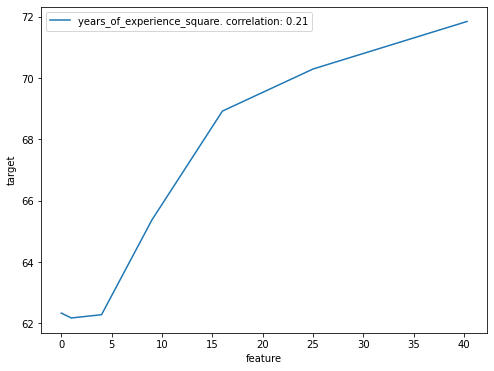

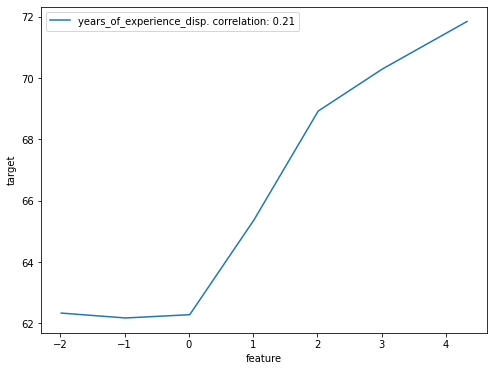

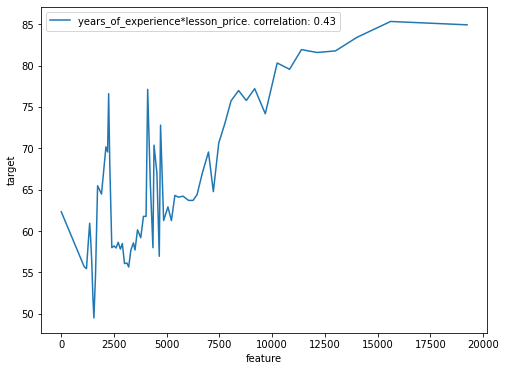

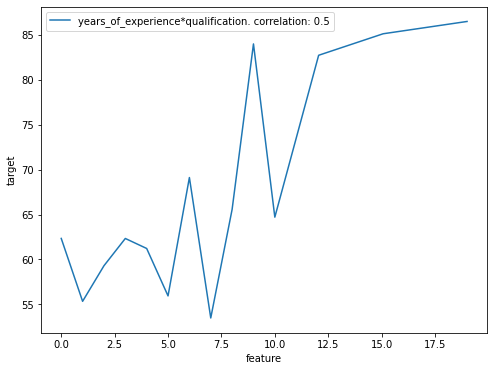

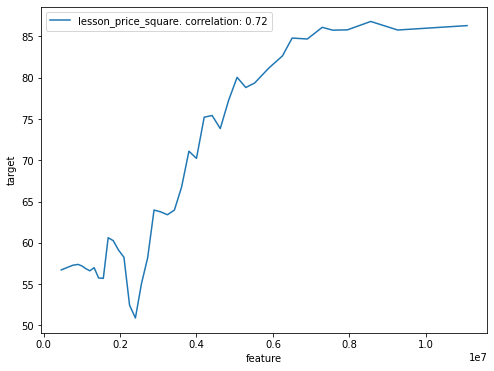

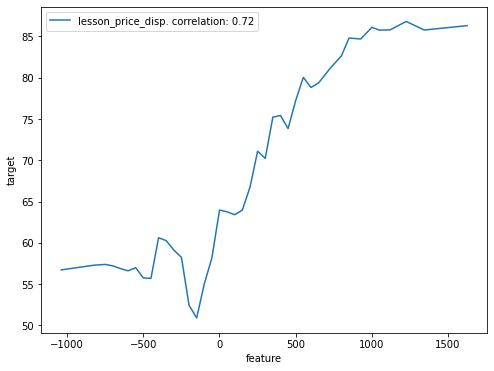

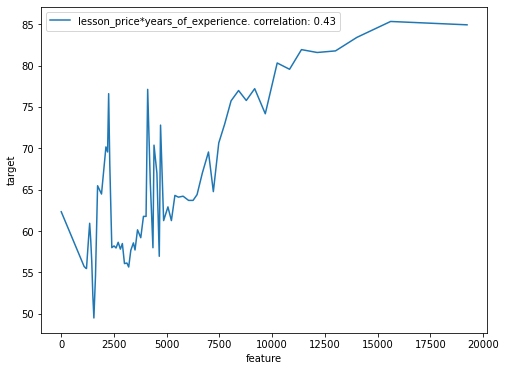

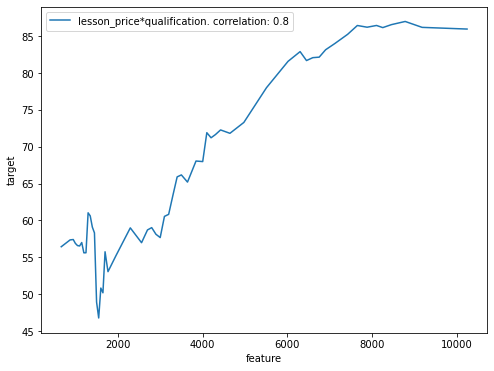

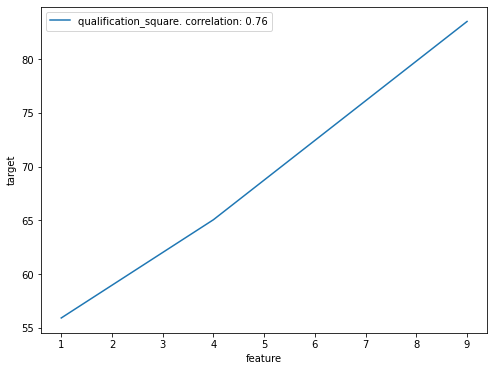

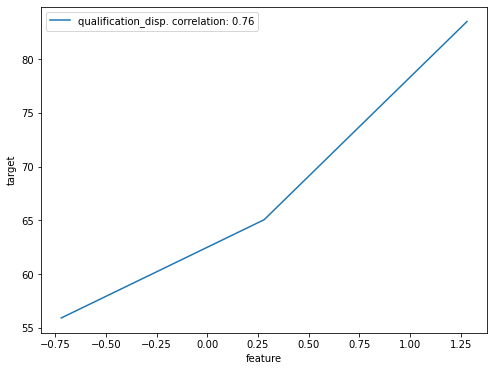

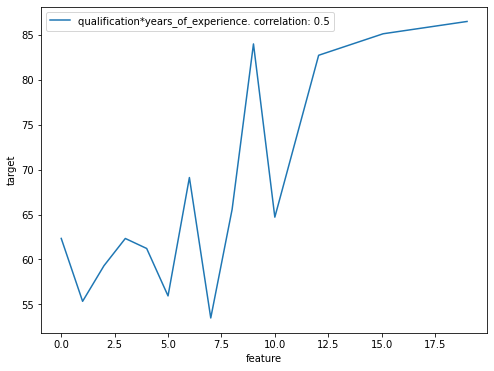

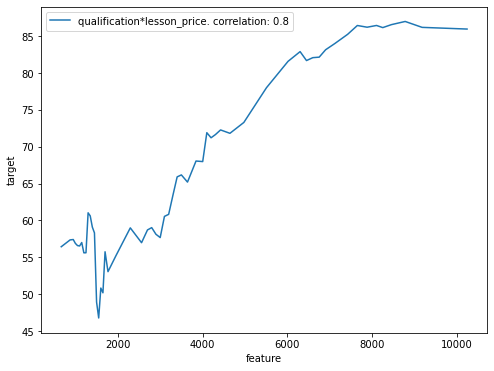

In [86]:
# Графическая оценка новых признаков
modif_df_train2_full = modif_df_train2.copy()
modif_df_train2_full["target"] = modif_df_train["mean_exam_points"]
z = modif_df_train2_full.columns
get_graph_dependency(modif_df_train2_full, "target", z[3], z[4], z[5], z[6], z[7], z[8], z[9], z[10], z[11], z[12], z[13], z[14])

Впринципе всех их можно назвать полезными. Точнее определить полезщность для какой либо модели можно только перебором, но это будет очень долго.

In [87]:
# Разделение учебного датасета с новыми признаками на тренеровочный и тестовый
X_train_modif2, X_test_modif2, y_train, y_test = train_test_split(
    modif_df_train2, 
    modif_df_train["mean_exam_points"], 
    test_size=0.3, random_state=42)

In [88]:
# Получение нормализованных тренировачных и тестовых данных
n_X_train_modif2 = norm(X_train_modif2)
n_X_test_modif2 = norm(X_test_modif2)

In [102]:
# Проверка линейной модели на датасете с новыми признаками
model1_m = Linear_model(alpha=0.005, iterations=30000, stop_value=0.0001, print_param=True)
model1_m.fit(n_X_train_modif2, y_train)
model1_m.predict(n_X_test_modif2, y_test)

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [00:42<00:00, 710.95it/s]


End iteration:30000
End MSE:110.20323501847967
R2 for train data:0.4008463519823542
Params: alpha=0.005, stop_value=0.0001, max_iteration=30000
W:[ 35.18992802  90.12604296   4.72064722  -2.31384264  35.18992802
 -51.77320107   3.54758586 -49.76898474  90.12604296 -51.77320107
  -9.92340053   4.95701516   4.72064722   3.54758586  -9.92340053]
MSE for test data:108.24216751574359
R2 for test data:0.4038913988649637


array([56.79790413, 47.52048598, 62.65593235, ..., 46.12213349,
       80.07926194, 48.48719007])

Линейную модель новые признаки улучшили и теперь она упирается в колличество итераций.

In [92]:
# Проверка случайного леса на датасете с новыми признаками
model2_m2 = Random_forest1(checking_main_progress=True)

Параметры модели: 
 Колличество деревьев:5
 Максимальная глубина дерева:15
 Минимальное колличество объектов в листе:10


In [93]:
model2_m.fit(modif_df_train2, modif_df_train["mean_exam_points"])

----------------Построение дерева №1--------------------------------


----------------Дерево №1 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 33 | Максимум объектов в одном листе: 9077
----------------Построение дерева №2--------------------------------


----------------Дерево №2 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 50 | Максимум объектов в одном листе: 8833
----------------Построение дерева №3--------------------------------


----------------Дерево №3 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 62 | Максимум объектов в одном листе: 8477
----------------Построение дерева №4--------------------------------


----------------Дерево №4 построено--------------------------------


Максимальная глубина: 15 | Колличество листьев: 50 | Максимум объектов в одном листе: 8835
----------------Построение дерева №5--------------------------------


-

In [94]:
# Просмотр первых 10 предсказаний случайного леса
model2_m.predict(modif_df_test2)[:10]

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 526208.66it/s]


[61.50571719687535,
 61.50571719687535,
 61.50571719687535,
 87.94117647058823,
 86.5,
 61.50571719687535,
 61.50571719687535,
 61.50571719687535,
 61.50571719687535,
 82.34285714285714]

У леса та же проблема с максимальной глубиной.

In [95]:
# Проверка KNN модели на датасете с новыми признаками
model3_m = KNN_model(X_train_modif2, y_train)

In [97]:
# Просмотр первых 10 предсказаний и ошибки модели
model3_m.predict(X_test_modif2, y_test)[:10]

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:13<00:00, 229.12it/s]


MSE для тестовой выборки: 53.97874666666673
Коэффицент детерминации для тестовой выборки: 0.7027295747582927


[45.4, 62.0, 59.2, 82.6, 86.2, 51.4, 82.6, 69.8, 63.4, 72.6]

KNN модель немного улучшилась.

### Работа с гиперпараметрами и получение итоговых предсказаний для df_test

<b>Линейная модель</b>

Так как линейная модель теперь уприается в коллиество итераций повысим их лимит допустим до 100 000. alpha выставим 0.01, Кретерий остановки снизим до 0.000001

In [105]:
# Линейная модель альфа=0.01 / максимум итераций=100 000 / критерий остановки по качеству=0.000001
model1_m = Linear_model(alpha=0.01, iterations=100000, stop_value=0.000001, print_param=True)
model1_m.fit(n_X_train_modif2, y_train)

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [02:17<00:00, 725.75it/s]

End iteration:100000
End MSE:91.01305826411037
R2 for train data:0.5051796268318243
Params: alpha=0.01, stop_value=1e-06, max_iteration=100000
W:[  27.61536195  101.42937737  -19.78591171    2.59423543   27.61536195
  -75.01636979   37.75561409 -118.38722168  101.42937737  -75.01636979
   18.17220525   21.78628666  -19.78591171   37.75561409   18.17220525]


In [106]:
model1_m.predict(n_X_test_modif2, y_test)[:20]

MSE for test data:122.67599275890538
R2 for test data:0.3244017916979851


array([57.42565175, 47.64317498, 57.64995775, 74.01189648, 75.21240123,
       68.36019902, 74.01189648, 61.89357676, 60.12596074, 73.15732677,
       49.65461028, 72.63136203, 71.61102748, 47.79696112, 59.28844268,
       54.68572746, 74.81669837, 57.06857332, 56.15182145, 55.65862389])

Как видно при таких параметрах модель уже переобучается. Попробуем alpha=0.008, iterations=50000, stop_value=0.00001

In [111]:
# Линейная модель альфа=0.008 / максимум итераций=50 000 / критерий остановки по качеству=0.00001
model1_mb = Linear_model(alpha=0.008, iterations=50000, stop_value=0.00001, print_param=True)
model1_mb.fit(n_X_train_modif2, y_train)
model1_mb.predict(n_X_test_modif2, y_test)[:20]

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:10<00:00, 712.33it/s]

End iteration:50000
End MSE:96.83083507216693
R2 for train data:0.47354950093474857
Params: alpha=0.008, stop_value=1e-05, max_iteration=50000
W:[ 31.20171662  98.13952691  -5.76261094  -2.6656734   31.20171662
 -66.72623015  25.82617194 -81.80837603  98.13952691 -66.72623015
  -2.9905461   16.7554186   -5.76261094  25.82617194  -2.9905461 ]
MSE for test data:100.9157578442411
R2 for test data:0.4442392219070912


array([57.71341221, 47.60852851, 60.245175  , 79.5028279 , 83.90900424,
       69.13097195, 79.5028279 , 65.51402454, 63.41583024, 77.26170518,
       48.45698934, 78.11602282, 78.92500549, 46.53037898, 62.76369965,
       54.65983638, 79.76533469, 60.0813542 , 59.0984375 , 58.63055145])

Думаю больше уже значемого прироста качества для этой модели уже добиться не получится.
Запишем её предсказания для тестового датасета в фаил pred_regression_model

In [120]:
# Нормализация датасета для которого нужно получить прогнозы с новыми признаками
d = norm(modif_df_test2)

In [125]:
# Получение прогнозов
pred_regression_model = pd.DataFrame(model1_mb.predict(d))

In [128]:
# запись прогнозов в соответсвующий csv фаил
pred_regression_model.to_csv("pred_regression_model.csv")

<b>Случайный лес</b>

Для случайного леса повысим максимальную глубину дерева до 50, колличество деревьев до 10 и минимальное колличество объектов в листе до 15

In [265]:
# Случайный лес. Колличество деревьев=10 / Максимально допустимая глубина дерева=50 / Минимальное допустимое колличество объектов в узле=15
model2_mb2 = Random_forest1(tree_counts=10, max_deep_tree=50, min_items_for_leaf=15, checking_main_progress=True)
model2_mb2.fit(modif_df_train2, modif_df_train["mean_exam_points"])

Параметры модели: 
 Колличество деревьев:10
 Максимальная глубина дерева:50
 Минимальное колличество объектов в листе:15
----------------Построение дерева №1--------------------------------


----------------Дерево №1 построено--------------------------------


Максимальная глубина: 50 | Колличество листьев: 225 | Максимум объектов в одном листе: 330
----------------Построение дерева №2--------------------------------


----------------Дерево №2 построено--------------------------------


Максимальная глубина: 50 | Колличество листьев: 206 | Максимум объектов в одном листе: 363
----------------Построение дерева №3--------------------------------


----------------Дерево №3 построено--------------------------------


Максимальная глубина: 50 | Колличество листьев: 228 | Максимум объектов в одном листе: 291
----------------Построение дерева №4--------------------------------


----------------Дерево №4 построено--------------------------------


Максимальная глубина: 50 | Колличество лис

In [132]:
# Случайный лес. Колличество деревьев=10 / Максимально допустимая глубина дерева=50 / Минимальное допустимое колличество объектов в узле=15
model2_mb2 = Random_forest1(tree_counts=10, max_deep_tree=60, min_items_for_leaf=10, checking_main_progress=True)
model2_mb2.fit(modif_df_train2, modif_df_train["mean_exam_points"])

Параметры модели: 
 Колличество деревьев:10
 Максимальная глубина дерева:60
 Минимальное колличество объектов в листе:10
----------------Построение дерева №1--------------------------------


----------------Дерево №1 построено--------------------------------


Максимальная глубина: 56 | Колличество листьев: 280 | Максимум объектов в одном листе: 330
----------------Построение дерева №2--------------------------------


----------------Дерево №2 построено--------------------------------


Максимальная глубина: 60 | Колличество листьев: 257 | Максимум объектов в одном листе: 326
----------------Построение дерева №3--------------------------------


----------------Дерево №3 построено--------------------------------


Максимальная глубина: 50 | Колличество листьев: 278 | Максимум объектов в одном листе: 291
----------------Построение дерева №4--------------------------------


----------------Дерево №4 построено--------------------------------


Максимальная глубина: 60 | Колличество лис

In [133]:
# Случайный лес. Колличество деревьев=5 / Максимально допустимая глубина дерева=40 / Минимальное допустимое колличество объектов в узле=15
model2_mb2 = Random_forest1(tree_counts=5, max_deep_tree=40, min_items_for_leaf=15, checking_main_progress=True)
model2_mb2.fit(modif_df_train2, modif_df_train["mean_exam_points"])

Параметры модели: 
 Колличество деревьев:5
 Максимальная глубина дерева:40
 Минимальное колличество объектов в листе:15
----------------Построение дерева №1--------------------------------


----------------Дерево №1 построено--------------------------------


Максимальная глубина: 40 | Колличество листьев: 204 | Максимум объектов в одном листе: 697
----------------Построение дерева №2--------------------------------


----------------Дерево №2 построено--------------------------------


Максимальная глубина: 40 | Колличество листьев: 182 | Максимум объектов в одном листе: 871
----------------Построение дерева №3--------------------------------


----------------Дерево №3 построено--------------------------------


Максимальная глубина: 40 | Колличество листьев: 177 | Максимум объектов в одном листе: 2489
----------------Построение дерева №4--------------------------------


----------------Дерево №4 построено--------------------------------


Максимальная глубина: 40 | Колличество лис

Как видно качество модели колеблется возле R2 = 0.7

Глубина 60 уже много. Впринципе на 50 модель показывала хороший результат. Так как из-за долгой работы модели точнее подбирать параметры очень времязатратно. Получим предсказания от леса из 30 деревьев с максимальной глубиной 45 и максимальным числом обьектов в листе 15. 

In [148]:
# Обучение модели леса с вышеописанными параметрами
model2_mb2 = Random_forest1(tree_counts=30, max_deep_tree=45, min_items_for_leaf=15, checking_main_progress=True)
model2_mb2.fit(modif_df_train2, modif_df_train["mean_exam_points"])

Параметры модели: 
 Колличество деревьев:30
 Максимальная глубина дерева:45
 Минимальное колличество объектов в листе:15
----------------Построение дерева №1--------------------------------


----------------Дерево №1 построено--------------------------------


Максимальная глубина: 45 | Колличество листьев: 187 | Максимум объектов в одном листе: 1614
----------------Построение дерева №2--------------------------------


----------------Дерево №2 построено--------------------------------


Максимальная глубина: 45 | Колличество листьев: 175 | Максимум объектов в одном листе: 2375
----------------Построение дерева №3--------------------------------


----------------Дерево №3 построено--------------------------------


Максимальная глубина: 45 | Колличество листьев: 202 | Максимум объектов в одном листе: 602
----------------Построение дерева №4--------------------------------


----------------Дерево №4 построено--------------------------------


Максимальная глубина: 45 | Колличество л

MSE для дерева №11 из 30 = 55.32632441288913
Коэффицент детерминации для дерева №11 из 30 = 0.6929627920578583

MSE для дерева №12 из 30 = 47.50257382823083
Коэффицент детерминации для дерева №12 из 30 = 0.749404563899339

MSE для дерева №13 из 30 = 49.61517688360789
Коэффицент детерминации для дерева №13 из 30 = 0.729127112824878

MSE для дерева №14 из 30 = 53.620514193893946
Коэффицент детерминации для дерева №14 из 30 = 0.7066634660104936

MSE для дерева №15 из 30 = 48.682906688687034
Коэффицент детерминации для дерева №15 из 30 = 0.7339854808185564

MSE для дерева №16 из 30 = 48.53817000541419
Коэффицент детерминации для дерева №16 из 30 = 0.730776911293366

MSE для дерева №17 из 30 = 49.56614626129827
Коэффицент детерминации для дерева №17 из 30 = 0.7210423649566859

MSE для дерева №18 из 30 = 50.42693253209506
Коэффицент детерминации для дерева №18 из 30 = 0.7218846289737133

MSE для дерева №19 из 30 = 49.231880181866806
Коэффицент детерминации для дерева №19 из 30 = 0.7290223436

In [171]:
# Получение предсказаний от леса
pred_random_forest_model = pd.DataFrame(model2_mb2.predict(modif_df_test2)) 

Получение предсказаний для дерева №1 из 30
Получение предсказаний для дерева №2 из 30
Получение предсказаний для дерева №3 из 30
Получение предсказаний для дерева №4 из 30
Получение предсказаний для дерева №5 из 30
Получение предсказаний для дерева №6 из 30
Получение предсказаний для дерева №7 из 30
Получение предсказаний для дерева №8 из 30
Получение предсказаний для дерева №9 из 30
Получение предсказаний для дерева №10 из 30
Получение предсказаний для дерева №11 из 30
Получение предсказаний для дерева №12 из 30
Получение предсказаний для дерева №13 из 30
Получение предсказаний для дерева №14 из 30
Получение предсказаний для дерева №15 из 30
Получение предсказаний для дерева №16 из 30
Получение предсказаний для дерева №17 из 30
Получение предсказаний для дерева №18 из 30
Получение предсказаний для дерева №19 из 30
Получение предсказаний для дерева №20 из 30
Получение предсказаний для дерева №21 из 30
Получение предсказаний для дерева №22 из 30
Получение предсказаний для дерева №23 из 

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 159989.01it/s]


In [173]:
# Запись предсказаний в соответствующую переменную
pred_random_forest_model.to_csv("pred_random_forest_model.csv")

<b>KNN модель</b>

Тут не так много параметров. Просто попробуем различное взешивание и выберем лучший результат.

In [251]:
#Взвешивание по номеру соседа
model3_mbb = KNN_model(X_train_modif2, y_train, count_of_neighbors=5, weighing="number")                    
x = model3_mbb.predict(X_test_modif2, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:27<00:00, 110.97it/s]

MSE для тестовой выборки: 54.494785475095114
Коэффицент детерминации для тестовой выборки: 0.6998876585320781


In [253]:
#Без взвешивания
model3_mbb = KNN_model(X_train_modif2, y_train, count_of_neighbors=5, weighing=None)                    
x = model3_mbb.predict(X_test_modif2, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:18<00:00, 160.38it/s]

MSE для тестовой выборки: 53.97874666666673
Коэффицент детерминации для тестовой выборки: 0.7027295747582927


In [252]:
#Взвешивание по расстоянию
model3_mbb = KNN_model(X_train_modif2, y_train, count_of_neighbors=5, weighing="distance")                    
x = model3_mbb.predict(X_test_modif2, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:26<00:00, 111.74it/s]

MSE для тестовой выборки: 104.33600394840643
Коэффицент детерминации для тестовой выборки: 0.42540332673347503


In [254]:
#Взвешивание по расстоянию с нормализованными данными
model3_mbb = KNN_model(n_X_train_modif2, y_train, count_of_neighbors=5, weighing="distance")                    
x = model3_mbb.predict(n_X_test_modif2, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:27<00:00, 110.42it/s]

MSE для тестовой выборки: 92.0974854713946
Коэффицент детерминации для тестовой выборки: 0.4928029945037615


Модель с взвешиванием по дистанции сильно отстает. Остальные примерно на одном уровне пробуем 3\7\10\15 соседей

In [255]:
#Взвешивание по номеру соседа. 3 соседа.
model3_mbb = KNN_model(X_train_modif2, y_train, count_of_neighbors=3, weighing="number")                    
x = model3_mbb.predict(X_test_modif2, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:23<00:00, 128.63it/s]

MSE для тестовой выборки: 58.362640625
Коэффицент детерминации для тестовой выборки: 0.678586701837291


In [256]:
#Взвешивание по номеру соседа. 7 соседей.
model3_mbb = KNN_model(X_train_modif2, y_train, count_of_neighbors=7, weighing="number")                    
x = model3_mbb.predict(X_test_modif2, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:26<00:00, 111.35it/s]

MSE для тестовой выборки: 54.494785475095114
Коэффицент детерминации для тестовой выборки: 0.6998876585320781


In [257]:
#Взвешивание по номеру соседа. 10 соседей.
model3_mbb = KNN_model(X_train_modif2, y_train, count_of_neighbors=10, weighing="number")                    
x = model3_mbb.predict(X_test_modif2, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:27<00:00, 110.41it/s]

MSE для тестовой выборки: 54.494785475095114
Коэффицент детерминации для тестовой выборки: 0.6998876585320781


In [259]:
#Без взвешивания. 3 соседа.
model3_mbb = KNN_model(X_train_modif2, y_train, count_of_neighbors=3, weighing=None)                    
x = model3_mbb.predict(X_test_modif2, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:19<00:00, 157.24it/s]

MSE для тестовой выборки: 53.97874666666673
Коэффицент детерминации для тестовой выборки: 0.7027295747582927


In [260]:
#Без взвешивания. 7 соседей.
model3_mbb = KNN_model(X_train_modif2, y_train, count_of_neighbors=7, weighing=None)                    
x = model3_mbb.predict(X_test_modif2, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:19<00:00, 155.17it/s]

MSE для тестовой выборки: 53.97874666666673
Коэффицент детерминации для тестовой выборки: 0.7027295747582927


In [261]:
#Без взвешивания. 10 соседей.
model3_mbb = KNN_model(X_train_modif2, y_train, count_of_neighbors=10, weighing=None)                    
x = model3_mbb.predict(X_test_modif2, y_test)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:18<00:00, 159.99it/s]

MSE для тестовой выборки: 53.97874666666673
Коэффицент детерминации для тестовой выборки: 0.7027295747582927


Особой разницы в качестве нет. Но думаю лучше использовать модель с взвешиванием по номеру соседа с 7 соседями

In [ ]:
model3_mbb = KNN_model(X_train_modif2, y_train, count_of_neighbors=7, weighing="number")
pred_KNN_model = pd.DataFrame(model3_mbb.predict(modif_df_test2))

 59%|████████████████████████████████████████████▊                               | 5893/10000 [00:45<00:31, 131.74it/s]

In [264]:
pred_KNN_model.to_csv("pred_KNN_model.csv")